In [2]:
import torch

In [3]:
torch.__version__

'1.13.1'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra

from pyroomacoustics.directivities import (
    DirectivityPattern,
    DirectionVector,
    CardioidFamily,
)

In [8]:
def get_a_figure(fig_size=[7.6,7.6], dpi=300):
    fig_all = plt.figure()
    fig_all.set_size_inches(fig_size)
    fig_all.set_dpi(dpi)
    return fig_all

In [9]:
# def convert_fig_to_image(fig, dpi=300, fig_size=[15,15]):
#     # fig.tight_layout(pad=0.1)
#     fig.set_size_inches(fig_size)
#     fig.set_dpi(dpi)
#     fig.canvas.draw()
#     image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#     image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
#     return image

def convert_fig_to_image(fig, dpi=1200):
    fig.savefig('tmp_drawroom.jpeg', dpi=dpi, transparent=True, bbox_inches='tight')
    image = plt.imread('tmp_drawroom.jpeg')
    return image

In [10]:
def plot_image_to_fig(fig_all, image, position_vector):
    ax = fig_all.add_axes(position_vector)
    ax.axis('off')
    ax.imshow(image, aspect='equal')

In [11]:
def room_properties(absorption, size):
    if absorption=='high':
        absor = 0.7
    elif absorption=='medium':
        absor = 0.3
    elif absorption=='low':
        absor = 0.1
    else:
        raise ValueError("The absorption parameter can only take values ['low', 'medium', 'high']")
    
    if size=='large':
        size_coef = 5.0
    elif size=='medium':
        size_coef = 2.5
    elif size=='small':
        size_coef = 1.0
    else:
        raise ValueError("The absorption parameter can only take values ['low', 'medium', 'high']")
    return absor, size_coef

In [12]:
fig_all = get_a_figure()

<Figure size 2280x2280 with 0 Axes>

# ROOM1

In [13]:
absor, size_coef = room_properties('high', 'small')

Text(0.5, 0.92, 'Room1 Layout 3D')

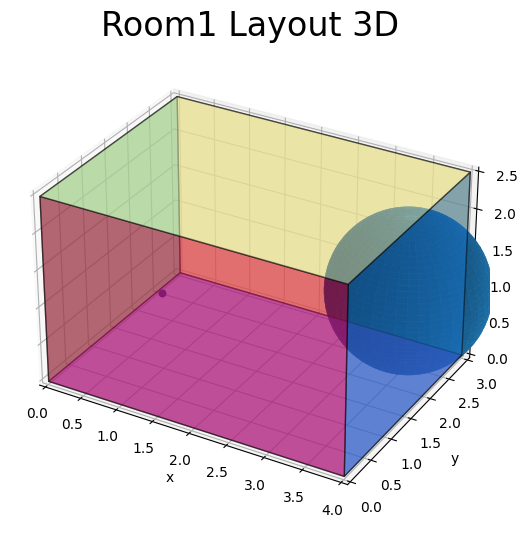

In [14]:

room = pra.ShoeBox(
    p=size_coef*np.array([4, 3, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add microphone array
mic_pattern = DirectivityPattern.OMNI
mic_dir: CardioidFamily = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=90, degrees=True),
    pattern_enum=mic_pattern,
)
room.add_microphone(loc=[3.5,2.5,1.], directivity=mic_dir)


fig11, ax11 = room.plot()

ax11.set_xlim([-0, 4])
ax11.set_ylim([-0, 3])
ax11.set_zlim([0, 2.5])
ax11.set_box_aspect((4,3,2.5));

# set title for ax11 at the bottom
ax11.set_title('Room1 Layout 3D', fontsize=24)

In [15]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [0, 1, 1/3, 1/4])

Text(0.5, 1.0, 'Room1 Layout 2D')

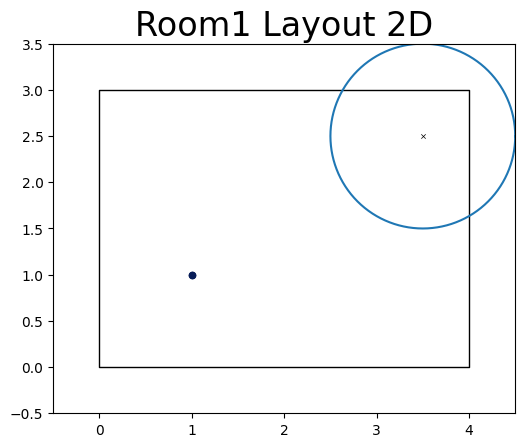

In [16]:
room = pra.ShoeBox(
    p=size_coef*np.array([4, 3]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# add source to 2D room
room.add_source([1.,1.])

# add microphone array
mic_pattern = DirectivityPattern.OMNI
mic_dir: CardioidFamily = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=90, degrees=True),
    pattern_enum=mic_pattern,
)
room.add_microphone(loc=[3.5,2.5], directivity=mic_dir)

fig11, ax11 = room.plot()
ax11.set_xlim([-0.5, 4.5])
ax11.set_ylim([-0.5, 3.5])

# set title for ax11 at the bottom
ax11.set_title('Room1 Layout 2D', fontsize=24)

In [17]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [0, 3/4, 1/3, 1/4])

### output simulation

In [18]:

room = pra.ShoeBox(
    p=size_coef*np.array([4, 3, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)
room.set_ray_tracing(receiver_radius=0.1, n_rays=10000, energy_thres=1e-5)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add microphone array
room.add_microphone(loc=[3.5,2.5,1.])

room.simulate()
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

In [19]:
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")
IPython.display.Audio(signal, rate=fs)

# ROOM2

In [20]:
absor, size_coef = room_properties('low', 'large')

Text(0.5, 0.92, 'Room2 Layout 3D')

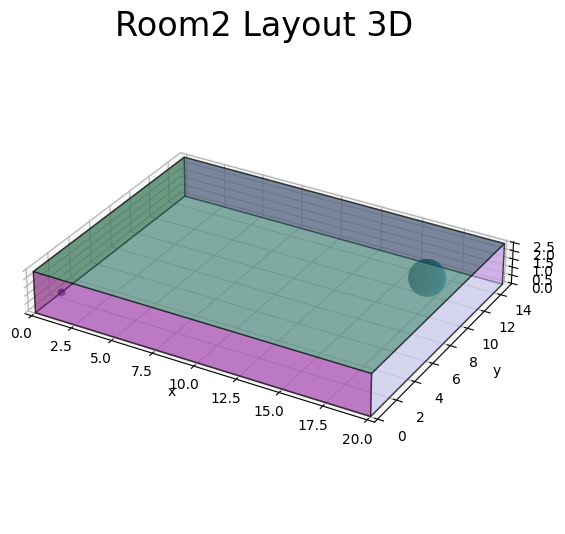

In [21]:
room = pra.ShoeBox(
    p=np.array([size_coef*4, size_coef*3, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add microphone array
mic_pattern = DirectivityPattern.OMNI
mic_dir: CardioidFamily = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=90, degrees=True),
    pattern_enum=mic_pattern,
)
room.add_microphone(loc=[17.,12.,1.], directivity=mic_dir)


fig11, ax11 = room.plot()

ax11.set_xlim([-0, 4*size_coef])
ax11.set_ylim([-0, 3*size_coef])
ax11.set_zlim([0, 2.5])
ax11.set_box_aspect((4*size_coef,3*size_coef,2.5));

# set title for ax11 at the bottom
ax11.set_title('Room2 Layout 3D', fontsize=24)

In [22]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [1/3, 1, 1/3, 1/4])

Text(0.5, 1.0, 'Room2 Layout 2D')

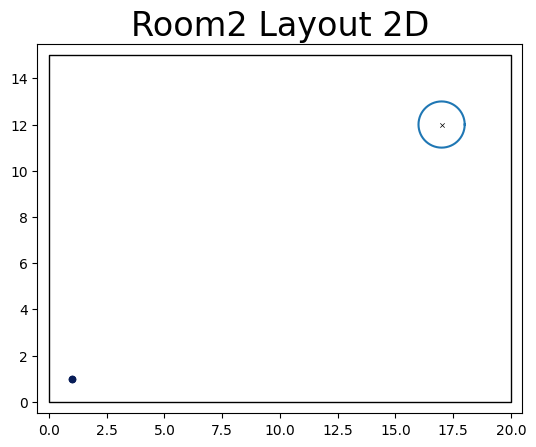

In [21]:
room = pra.ShoeBox(
    p=size_coef*np.array([4, 3]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# add source to 2D room
room.add_source([1.,1.])

# add microphone array
mic_pattern = DirectivityPattern.OMNI
mic_dir: CardioidFamily = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=90, degrees=True),
    pattern_enum=mic_pattern,
)
room.add_microphone(loc=[17.,12.], directivity=mic_dir)

fig11, ax11 = room.plot()
ax11.set_xlim([-0.5, 4*size_coef+0.5])
ax11.set_ylim([-0.5, 3*size_coef+0.5])

# set title for ax11 at the bottom
ax11.set_title('Room2 Layout 2D', fontsize=24)

In [22]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [1/3, 3/4, 1/3, 1/4])

### output simulation

In [23]:

room = pra.ShoeBox(
    p=np.array([4*size_coef, 3*size_coef, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)
room.set_ray_tracing(receiver_radius=0.1, n_rays=10000, energy_thres=1e-5)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add microphone array
room.add_microphone(loc=[17.,12.,1.])

room.simulate()
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

# ROOM3

In [24]:
absor, size_coef = room_properties('medium', 'medium')

Text(0.5, 0.92, 'Room3 Layout 3D')

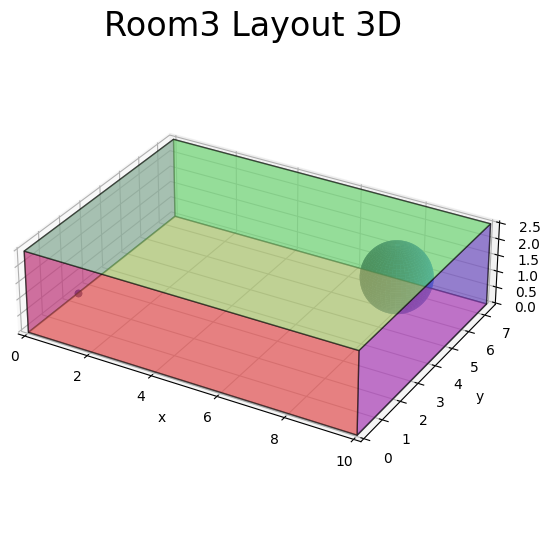

In [25]:

room = pra.ShoeBox(
    p=np.array([size_coef*4, size_coef*3, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add microphone array
mic_pattern = DirectivityPattern.OMNI
mic_dir: CardioidFamily = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=90, degrees=True),
    pattern_enum=mic_pattern,
)
room.add_microphone(loc=[8.,6.,1.], directivity=mic_dir)


fig11, ax11 = room.plot()

ax11.set_xlim([-0, 4*size_coef])
ax11.set_ylim([-0, 3*size_coef])
ax11.set_zlim([0, 2.5])
ax11.set_box_aspect((4*size_coef,3*size_coef,2.5));

# set title for ax11 at the bottom
ax11.set_title('Room3 Layout 3D', fontsize=24)

In [26]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [2/3, 1, 1/3, 1/4])

Text(0.5, 1.0, 'Room3 Layout 2D')

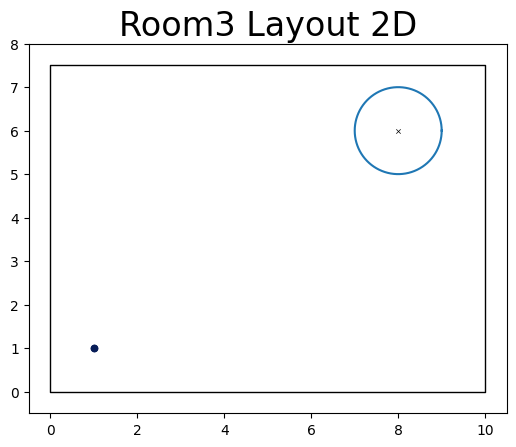

In [27]:
room = pra.ShoeBox(
    p=size_coef*np.array([4, 3]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# add source to 2D room
room.add_source([1.,1.])

# add microphone array
mic_pattern = DirectivityPattern.OMNI
mic_dir: CardioidFamily = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=90, degrees=True),
    pattern_enum=mic_pattern,
)
room.add_microphone(loc=[8.,6.], directivity=mic_dir)

fig11, ax11 = room.plot()
ax11.set_xlim([-0.5, 4*size_coef+0.5])
ax11.set_ylim([-0.5, 3*size_coef+0.5])

# set title for ax11 at the bottom
ax11.set_title('Room3 Layout 2D', fontsize=24)

In [28]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [2/3, 3/4, 1/3, 1/4])

### output simulation

In [29]:

room = pra.ShoeBox(
    p=np.array([4*size_coef, 3*size_coef, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)
room.set_ray_tracing(receiver_radius=0.1, n_rays=10000, energy_thres=1e-5)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add microphone array
room.add_microphone(loc=[8.,6.,1.])

room.simulate()
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

# ROOM4

In [30]:
absor, size_coef = room_properties('medium', 'medium')

Text(0.5, 0.92, 'Room4 Layout 3D')

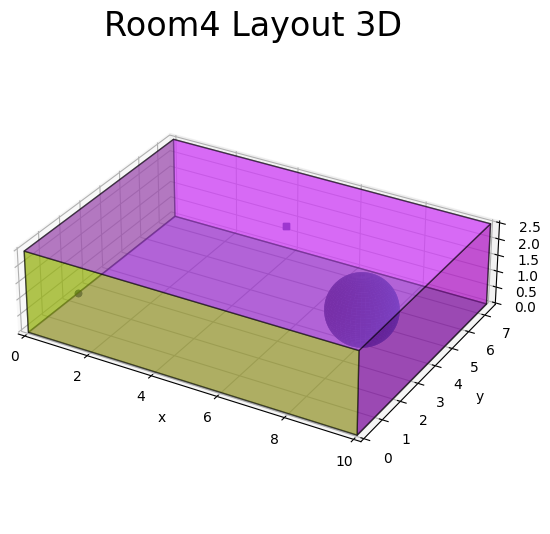

In [31]:
room = pra.ShoeBox(
    p=np.array([size_coef*4, size_coef*3, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add noise source
fs, noise = wavfile.read("/nvme/zhiyong/musan/noise/free-sound/noise-free-sound-0000.wav")

room.add_source([4.,7.,1.], signal=noise, delay=0.)

# add microphone array
mic_pattern = DirectivityPattern.OMNI
mic_dir: CardioidFamily = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=90, degrees=True),
    pattern_enum=mic_pattern,
)
room.add_microphone(loc=[8.,4.,1.], directivity=mic_dir)


fig11, ax11 = room.plot()

ax11.set_xlim([-0, 4*size_coef])
ax11.set_ylim([-0, 3*size_coef])
ax11.set_zlim([0, 2.5])
ax11.set_box_aspect((4*size_coef,3*size_coef,2.5));

# set title for ax11 at the bottom
ax11.set_title('Room4 Layout 3D', fontsize=24)

In [32]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [0, 2/4, 1/3, 1/4])

Text(0.5, 1.0, 'Room4 Layout 2D')

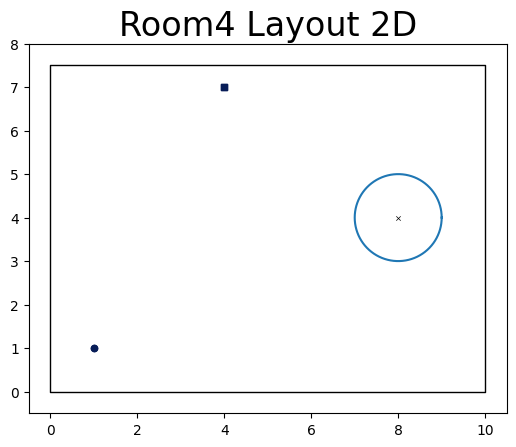

In [33]:
room = pra.ShoeBox(
    p=size_coef*np.array([4, 3]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# add source to 2D room
room.add_source([1.,1.])

# add noise source
room.add_source([4.,7.])

# add microphone array
mic_pattern = DirectivityPattern.OMNI
mic_dir: CardioidFamily = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=90, degrees=True),
    pattern_enum=mic_pattern,
)
room.add_microphone(loc=[8.,4.], directivity=mic_dir)

fig11, ax11 = room.plot()
ax11.set_xlim([-0.5, 4*size_coef+0.5])
ax11.set_ylim([-0.5, 3*size_coef+0.5])

# set title for ax11 at the bottom
ax11.set_title('Room4 Layout 2D', fontsize=24)

In [34]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [0, 1/4, 1/3, 1/4])

### output simulation

In [35]:

room = pra.ShoeBox(
    p=np.array([4*size_coef, 3*size_coef, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)
room.set_ray_tracing(receiver_radius=0.1, n_rays=10000, energy_thres=1e-5)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add noise source
fs, noise = wavfile.read("/nvme/zhiyong/musan/noise/free-sound/noise-free-sound-0002.wav")

room.add_source([4.,7.,1.], signal=noise[:len(signal)], delay=0.)

# add microphone array
room.add_microphone(loc=[8.,4.,1.])

room.simulate()
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

# ROOM5

In [50]:
absor, size_coef = room_properties('medium', 'medium')

Text(0.5, 0.92, 'Room5 Layout 3D')

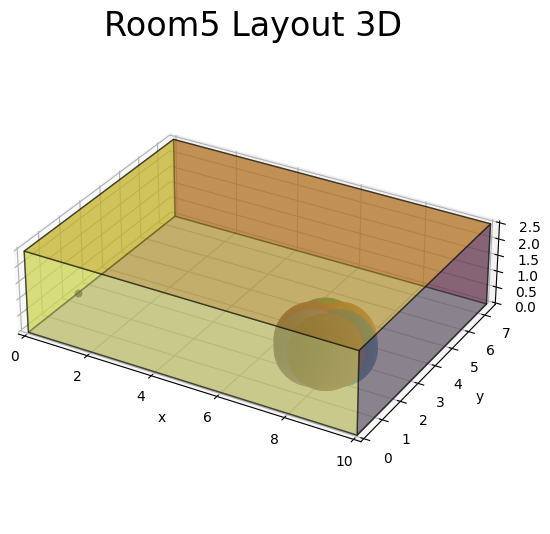

In [53]:
room = pra.ShoeBox(
    p=np.array([size_coef*4, size_coef*3, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add microphone array
R = pra.circular_2D_array(center=[8.,2.], M=6, phi0=0, radius=0.4)
R = np.concatenate((R, np.ones((1, 6))))
dir_list = []
for i in range(6):
    dir_list.append(CardioidFamily(
    orientation=DirectionVector(azimuth=0, colatitude=90, degrees=True),
    pattern_enum=DirectivityPattern.OMNI,))

room.add_microphone_array(pra.MicrophoneArray(R, room.fs, directivity=dir_list))


fig11, ax11 = room.plot()

ax11.set_xlim([-0, 4*size_coef])
ax11.set_ylim([-0, 3*size_coef])
ax11.set_zlim([0, 2.5])
ax11.set_box_aspect((4*size_coef,3*size_coef,2.5));

# set title for ax11 at the bottom
ax11.set_title('Room5 Layout 3D', fontsize=24)

In [54]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [1/3, 2/4, 1/3, 1/4])

Text(0.5, 1.0, 'Room5 Layout 2D')

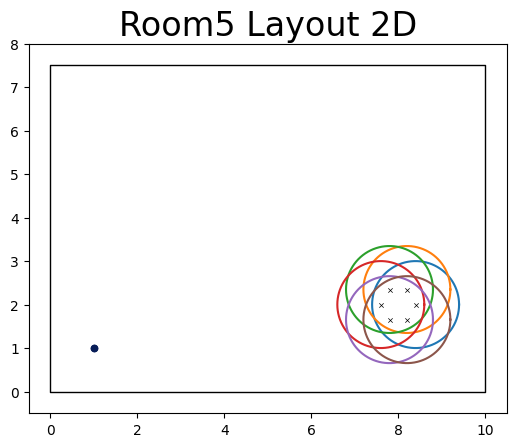

In [55]:
room = pra.ShoeBox(
    p=size_coef*np.array([4, 3]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# add source to 2D room
room.add_source([1.,1.])


# add microphone array
R = pra.circular_2D_array(center=[8.,2.], M=6, phi0=0, radius=0.4)
dir_list = []
for i in range(6):
    dir_list.append(CardioidFamily(
    orientation=DirectionVector(azimuth=0, colatitude=90, degrees=True),
    pattern_enum=DirectivityPattern.OMNI,))

room.add_microphone_array(pra.MicrophoneArray(R, room.fs, directivity=dir_list))

fig11, ax11 = room.plot()
ax11.set_xlim([-0.5, 4*size_coef+0.5])
ax11.set_ylim([-0.5, 3*size_coef+0.5])

# set title for ax11 at the bottom
ax11.set_title('Room5 Layout 2D', fontsize=24)

In [56]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [1/3, 1/4, 1/3, 1/4])

### output simulation

In [58]:
room = pra.ShoeBox(
    p=np.array([4*size_coef, 3*size_coef, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)
room.set_ray_tracing(receiver_radius=0.1, n_rays=10000, energy_thres=1e-5)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add microphone array
R = pra.circular_2D_array(center=[8.,2.], M=6, phi0=0, radius=0.05)
R = np.concatenate((R, np.ones((1, 6))))
# dir_list = []
# for i in range(6):
#     dir_list.append(CardioidFamily(
#     orientation=DirectionVector(azimuth=0, colatitude=90, degrees=True),
#     pattern_enum=DirectivityPattern.OMNI,))

# mics = pra.MicrophoneArray(R, room.fs, directivity=dir_list)
mics = pra.Beamformer(R, fs, N=fft_len, Lg=Lg)
room.add_microphone_array(mics)

# Compute DAS weights
mics.rake_delay_and_sum_weights(room.sources[0][:1])

room.simulate()
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

In [59]:
signal_das = mics.process(FD=False)
IPython.display.Audio(signal_das, rate=fs)

# ROOM6

In [62]:
absor, size_coef = room_properties('medium', 'medium')

Text(0.5, 0.92, 'Room6 Layout 3D')

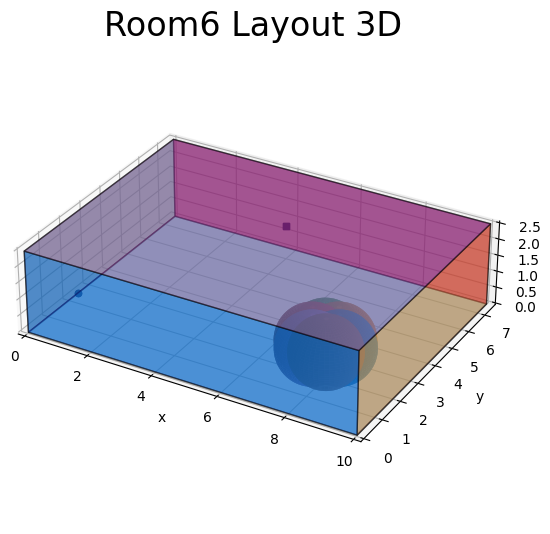

In [64]:
room = pra.ShoeBox(
    p=np.array([size_coef*4, size_coef*3, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add noise source
fs, noise = wavfile.read("/nvme/zhiyong/musan/noise/free-sound/noise-free-sound-0000.wav")

room.add_source([4.,7.,1.], signal=noise, delay=0.)

# add microphone array
R = pra.circular_2D_array(center=[8.,2.], M=6, phi0=0, radius=0.4)
R = np.concatenate((R, np.ones((1, 6))))
dir_list = []
for i in range(6):
    dir_list.append(CardioidFamily(
    orientation=DirectionVector(azimuth=0, colatitude=90, degrees=True),
    pattern_enum=DirectivityPattern.OMNI,))

room.add_microphone_array(pra.MicrophoneArray(R, room.fs, directivity=dir_list))


fig11, ax11 = room.plot()

ax11.set_xlim([-0, 4*size_coef])
ax11.set_ylim([-0, 3*size_coef])
ax11.set_zlim([0, 2.5])
ax11.set_box_aspect((4*size_coef,3*size_coef,2.5));

# set title for ax11 at the bottom
ax11.set_title('Room6 Layout 3D', fontsize=24)

In [65]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [2/3, 2/4, 1/3, 1/4])

Text(0.5, 1.0, 'Room6 Layout 2D')

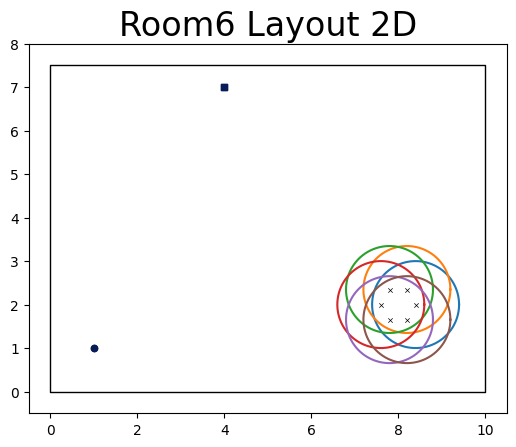

In [66]:
room = pra.ShoeBox(
    p=size_coef*np.array([4, 3]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# add source to 2D room
room.add_source([1.,1.])

# add noise source
room.add_source([4.,7.])

# add microphone array
R = pra.circular_2D_array(center=[8.,2.], M=6, phi0=0, radius=0.4)
dir_list = []
for i in range(6):
    dir_list.append(CardioidFamily(
    orientation=DirectionVector(azimuth=0, colatitude=90, degrees=True),
    pattern_enum=DirectivityPattern.OMNI,))

room.add_microphone_array(pra.MicrophoneArray(R, room.fs, directivity=dir_list))

fig11, ax11 = room.plot()
ax11.set_xlim([-0.5, 4*size_coef+0.5])
ax11.set_ylim([-0.5, 3*size_coef+0.5])

# set title for ax11 at the bottom
ax11.set_title('Room6 Layout 2D', fontsize=24)

In [67]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [2/3, 1/4, 1/3, 1/4])

### output simulation

In [68]:
room = pra.ShoeBox(
    p=np.array([4*size_coef, 3*size_coef, 2.5]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)
room.set_ray_tracing(receiver_radius=0.1, n_rays=10000, energy_thres=1e-5)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.,1.], signal=signal)

# add noise source
fs, noise = wavfile.read("/nvme/zhiyong/musan/noise/free-sound/noise-free-sound-0000.wav")

room.add_source([8.,7.,1.], signal=noise[:len(signal)], delay=0.)

# add microphone array
R = pra.circular_2D_array(center=[8.,2.], M=6, phi0=0, radius=0.05)
R = np.concatenate((R, np.ones((1, 6))))

mics = pra.Beamformer(R, fs, N=fft_len, Lg=Lg)
room.add_microphone_array(mics)

# Compute DAS weights
mics.rake_delay_and_sum_weights(room.sources[0][:1])

room.simulate()
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

In [69]:
signal_das = mics.process(FD=False)
IPython.display.Audio(signal_das, rate=fs)

In [46]:
fig_all.savefig('room_layout.pdf', bbox_inches='tight',dpi=1200)

# Plot BF

Text(0.5, 1.0, 'Room5 DAS beamforming')

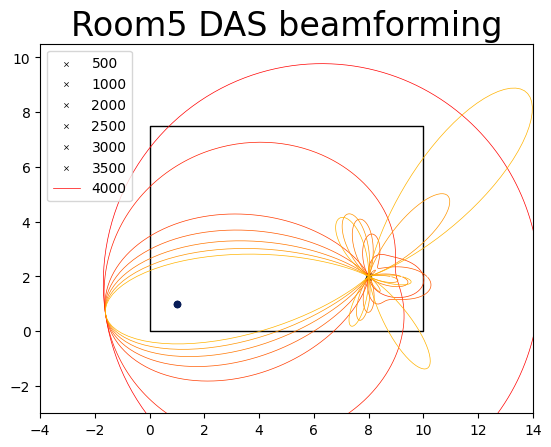

In [ ]:
fft_len = 512
Lg_t = 0.100                # filter size in seconds
Lg = np.ceil(Lg_t*16000)       # in samples

room = pra.ShoeBox(
    p=size_coef*np.array([4, 3]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)
room.set_ray_tracing(receiver_radius=0.1, n_rays=10000, energy_thres=1e-5)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.], signal=signal)


# add microphone array
R = pra.circular_2D_array(center=[8.,2.], M=6, phi0=0, radius=0.05)
# dir_list = []
# for i in range(6):
#     dir_list.append(CardioidFamily(
#     orientation=DirectionVector(azimuth=0, colatitude=90, degrees=True),
#     pattern_enum=DirectivityPattern.OMNI,))

# mics = pra.MicrophoneArray(R, room.fs, directivity=dir_list)
mics = pra.Beamformer(R, fs, N=fft_len, Lg=Lg)
room.add_microphone_array(mics)

# Compute DAS weights
mics.rake_delay_and_sum_weights(room.sources[0])

fig11, ax11 = room.plot(freq=[500, 1000, 2000, 2500, 3000, 3500, 4000])
ax11.legend(['500', '1000', '2000', '2500', '3000', '3500', '4000'])
ax11.set_xlim([-4, 4*size_coef+4])
ax11.set_ylim([-3, 3*size_coef+3])

# set title for ax11 at the bottom
ax11.set_title('Room5 DAS beamforming', fontsize=24)

Text(0.5, 1.0, 'Room6 DAS beamforming')

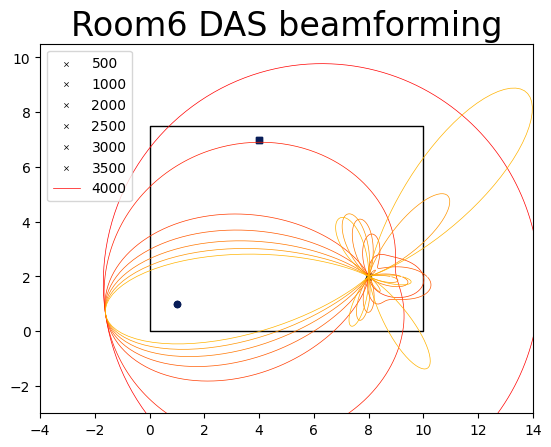

In [ ]:
room = pra.ShoeBox(
    p=size_coef*np.array([4, 3]),
    materials=pra.Material(absor),
    fs=16000,
    max_order=3,
    ray_tracing=False,
    air_absorption=True,
)

# specify signal source
fs, signal = wavfile.read("/nvme/zhiyong/voxceleb/vox2/test/aac/id00017/01dfn2spqyE/00001.wav")

# add source to 2D room
room.add_source([1.,1.], signal=signal)

# # add source to 2D room
# room.add_source([1.,1.])

# add noise source
fs, noise = wavfile.read("/nvme/zhiyong/musan/noise/free-sound/noise-free-sound-0002.wav")

room.add_source([4.,7.], signal=noise, delay=0.)


# add microphone array
R = pra.circular_2D_array(center=[8.,2.], M=6, phi0=0, radius=0.05)
# dir_list = []
# for i in range(6):
#     dir_list.append(CardioidFamily(
#     orientation=DirectionVector(azimuth=0, colatitude=90, degrees=True),
#     pattern_enum=DirectivityPattern.OMNI,))

# mics = pra.MicrophoneArray(R, room.fs, directivity=dir_list)
mics = pra.Beamformer(R, fs, N=fft_len, Lg=Lg)
room.add_microphone_array(mics)

# Compute DAS weights
mics.rake_delay_and_sum_weights(room.sources[0])

fig11, ax11 = room.plot(freq=[500, 1000, 2000, 2500, 3000, 3500, 4000])
ax11.legend(['500', '1000', '2000', '2500', '3000', '3500', '4000'])
ax11.set_xlim([-4, 4*size_coef+4])
ax11.set_ylim([-3, 3*size_coef+3])

# set title for ax11 at the bottom
ax11.set_title('Room6 DAS beamforming', fontsize=24)

In [ ]:
fig_all = get_a_figure([7.6/2,7.6/2])

<Figure size 1140x1140 with 0 Axes>

In [ ]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [0, 1, 1/2, 1/2])

In [ ]:
image11 = convert_fig_to_image(fig11)
plot_image_to_fig(fig_all, image11, [1/2, 1, 1/2, 1/2])

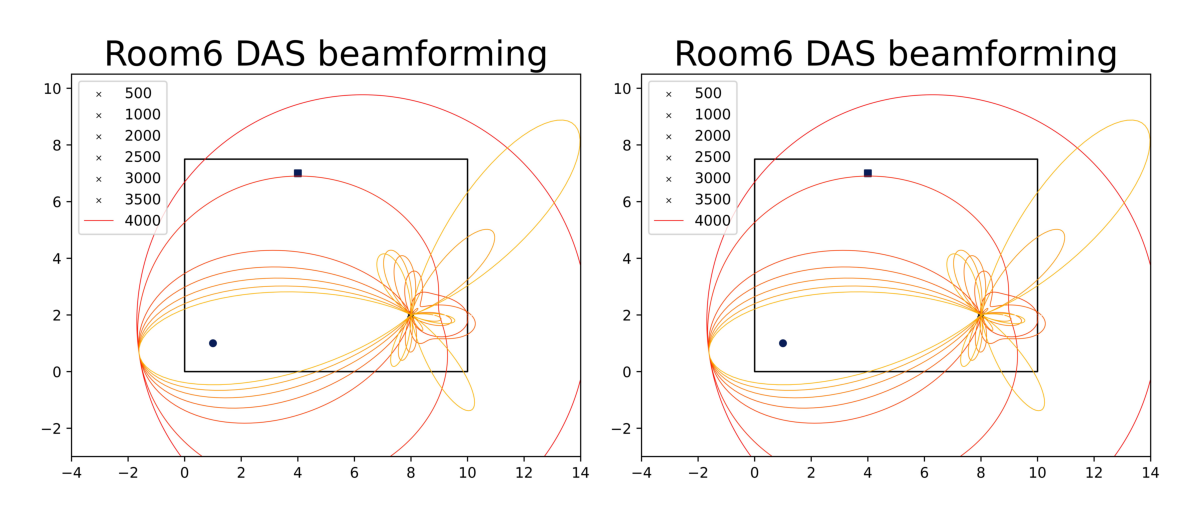

In [ ]:
fig_all

In [ ]:
fig_all.savefig('room_bf.pdf', bbox_inches='tight',dpi=1200)

# Output Wav

In [ ]:
room.simulate()
print("Center Mic:")
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

Center Mic:


In [ ]:
signal_das = mics.process(FD=False)
IPython.display.Audio(signal_das, rate=fs)

In [ ]:
def clip(signal, high, low):
    """Clip a signal from above at high and from below at low."""
    s = signal.copy()

    s[np.where(s > high)] = high
    s[np.where(s < low)] = low

    return s

def normalize(signal, bits=None):
    """
    normalize to be in a given range. The default is to normalize the maximum
    amplitude to be one. An optional argument allows to normalize the signal
    to be within the range of a given signed integer representation of bits.
    """

    s = signal.copy()

    s /= np.abs(s).max()

    # if one wants to scale for bits allocated
    if bits is not None:
        s *= 2 ** (bits - 1) - 1
        s = clip(s, 2 ** (bits - 1) - 1, -(2 ** (bits - 1)))

    return s

In [ ]:
def to_wav(filename, fs, signals, norm=False, bitdepth=np.float):
    """
    Save all the signals to wav files.

    Parameters
    ----------
    filename: str
        the name of the file
    mono: bool, optional
        if true, records only the center channel floor(M / 2) (default
        `False`)
    norm: bool, optional
        if true, normalize the signal to fit in the dynamic range (default
        `False`)
    bitdepth: int, optional
        the format of output samples [np.int8/16/32/64 or np.float
        (default)]
    """
    from scipy.io import wavfile

    signal = signals.T  # each column is a channel

    float_types = [float, np.float, np.float32, np.float64]

    if bitdepth in float_types:
        bits = None
    elif bitdepth is np.int8:
        bits = 8
    elif bitdepth is np.int16:
        bits = 16
    elif bitdepth is np.int32:
        bits = 32
    elif bitdepth is np.int64:
        bits = 64
    else:
        raise NameError("No such type.")

    if norm:
        signal = normalize(signal, bits=bits)

    signal = np.array(signal, dtype=bitdepth)

    wavfile.write(filename, fs, signal)

In [ ]:
to_wav("signal_das.wav", fs, signal_das, norm=True, bitdepth=np.int16)

In [ ]:
# save signal_das to wav file
signal_das = np.array(signal_das, dtype=np.int16)

wavfile.write("signal_das.wav", fs, signal_das)